In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.datasets import imdb
from sklearn.metrics import accuracy_score
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping


2025-02-24 15:23:00.641450: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-24 15:23:00.936298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740428581.137956   32781 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740428581.210102   32781 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-24 15:23:01.752166: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
train, test = imdb.load_data()
x_train, y_train = train
x_test, y_test = test
x_train = x_train[0:10000]
y_train = y_train[0:10000]
x_test = x_test[0:10000]
y_test = y_test[0:10000]

In [3]:
x_train_real = []
for i in range(len(x_train)):
    counts = np.zeros(10000)
    for j in x_train[i]:
        if(j <= 10000):
            counts[j-1] += 1
    x_train_real.append(counts)

x_test_real = []
for i in range(len(x_test)):
    counts = np.zeros(10000)
    for j in x_test[i]:
        if(j <= 10000):
            counts[j-1] += 1
    x_test_real.append(counts)


x_train_real = np.array(x_train_real)
x_test_real = np.array(x_test_real)
# print(x_train_real)
# print(x_test_real)

In [4]:
model = Sequential([
    Input(shape=(10000,)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu',),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


I0000 00:00:1740428600.839675   32781 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2256 MB memory:  -> device: 0, name: NVIDIA T500, pci bus id: 0000:01:00.0, compute capability: 7.5


In [9]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train_real, y_train, epochs = 100, batch_size = 512, validation_split = 0.1, callbacks=[early_stop])
model.evaluate(x_test_real, y_test) 

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 646ms/step - accuracy: 0.9397 - loss: 0.2192 - val_accuracy: 0.8780 - val_loss: 0.2936
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9347 - loss: 0.2129 - val_accuracy: 0.8790 - val_loss: 0.2920
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9368 - loss: 0.2130 - val_accuracy: 0.8790 - val_loss: 0.2911
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9414 - loss: 0.2112 - val_accuracy: 0.8790 - val_loss: 0.2905
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9378 - loss: 0.2095 - val_accuracy: 0.8800 - val_loss: 0.2894
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9474 - loss: 0.1924 - val_accuracy: 0.8800 - val_loss: 0.2893
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9502 - loss: 0.1892 - val_accuracy: 0.8800 - val_loss: 0.2891
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9436 - loss: 0.1908 - val_accuracy: 

[0.3245314061641693, 0.8758000135421753]

In [6]:
y_pred = model.predict(x_test_real)
y_pred = [1 if y_pred[i][0] > 0.5 else 0 for i in range(len(y_pred))]
print('Accuracy:',accuracy_score(y_test,y_pred)*100, '%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step
Accuracy: 87.32 %


In [7]:
print(history.history)

{'accuracy': [0.504444420337677, 0.5108888745307922, 0.524222195148468, 0.539222240447998, 0.5506666898727417, 0.5737777948379517, 0.5882222056388855, 0.6104444265365601, 0.6267777681350708, 0.656000018119812, 0.6679999828338623, 0.6778888702392578, 0.7096666693687439, 0.7195555567741394, 0.7350000143051147, 0.7488889098167419, 0.7505555748939514, 0.7734444737434387, 0.7808889150619507, 0.7932222485542297, 0.7986666560173035, 0.8122222423553467, 0.8144444227218628, 0.8237777948379517, 0.8341110944747925, 0.8385555744171143, 0.8489999771118164, 0.8487777709960938, 0.859333336353302, 0.8657777905464172, 0.870555579662323, 0.8704444169998169, 0.8763333559036255, 0.8758888840675354, 0.8898888826370239, 0.8872222304344177, 0.8913333415985107, 0.8964444398880005, 0.9016666412353516, 0.9051111340522766, 0.9047777652740479, 0.9072222113609314, 0.917555570602417, 0.9163333177566528, 0.917888879776001, 0.9224444627761841, 0.9237777590751648, 0.9277777671813965, 0.9255555272102356, 0.931777775287

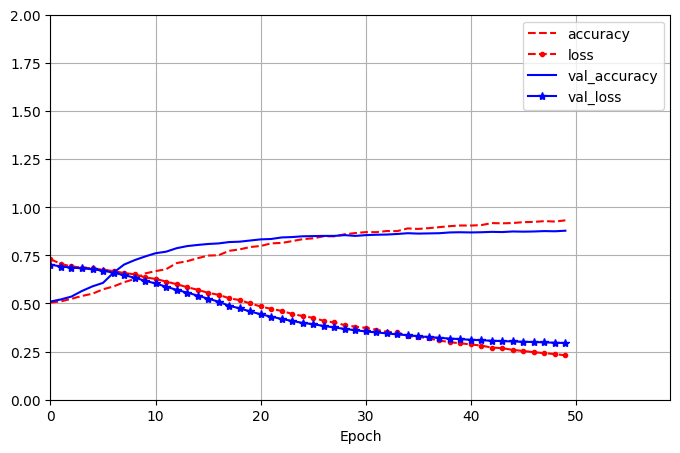

In [ ]:


pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 109], ylim=[0, 2], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]) 
plt.legend(loc="upper right")  # extra code
plt.show()